In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os


In [90]:
def load_images_from_folder(folder):
    images = []
    for file_name in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, file_name))
        if img is not None:
            images.append(img)
    return images

In [91]:
images = load_images_from_folder('C:\Vishnu\semester Files\Machine learning\project\Images\Eminem')
for img in images:
    test_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # plt.imshow(test_img, cmap = 'gray')
    # plt.show()  

In [92]:
for img in images:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plt.imshow(img_rgb)
    # plt.show()

In [93]:
for img in images:
    test_img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # plt.imshow(test_img_gray)
    # plt.show()
    # plt.imshow(test_img_gray, cmap = 'gray')
    # plt.show()

In [94]:
haar_cascade = cv2.CascadeClassifier('C:\Vishnu\semester Files\Machine learning\project\haarcascades\haarcascade_frontalface_alt.xml')
img_faces = []
for img in images:
    faces_rect = haar_cascade.detectMultiScale(img, 1.1, 9)
    print(faces_rect)
    img_faces.append(faces_rect)
    

()
()
[[270 187  98  98]
 [408 504 181 181]]
[[137 122 279 279]]
()
[[ 49  69 204 204]]
()
[[566 503 563 563]]
[[104 233 380 380]]
[[ 36  54 270 270]]
[[ 80  85 341 341]]
[[370  66 366 366]]
[[ 63  73 274 274]]
()
[[576 120 276 276]]
[[ 43  95 321 321]]
[[158 100 468 468]]


opencv_dnn_model = cv2.dnn.readNetFromCaffe(prototxt="models/deploy.prototxt",
                                            caffeModel="models/res10_300x300_ssd_iter_140000_fp16.caffemodel")

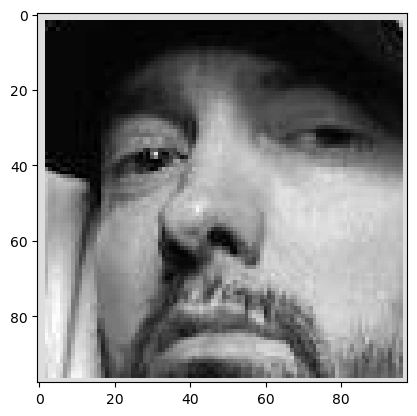

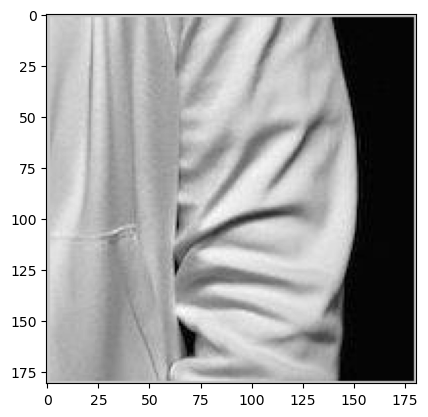

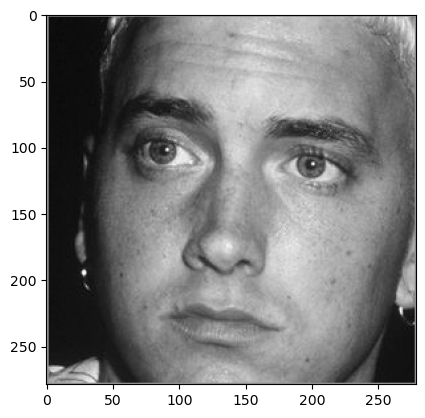

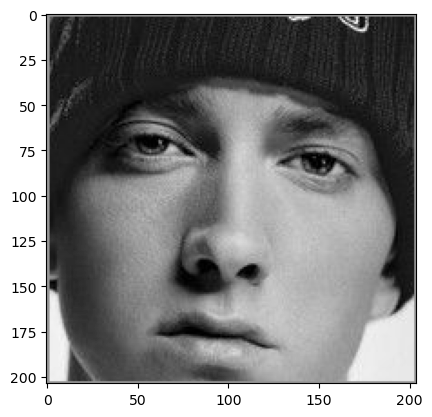

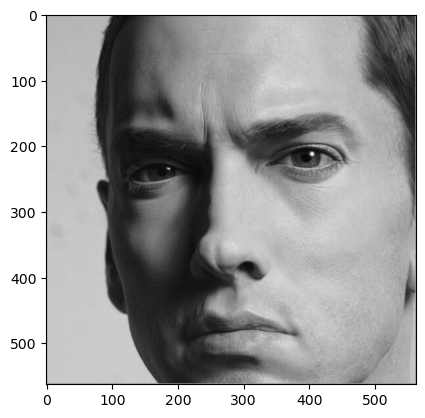

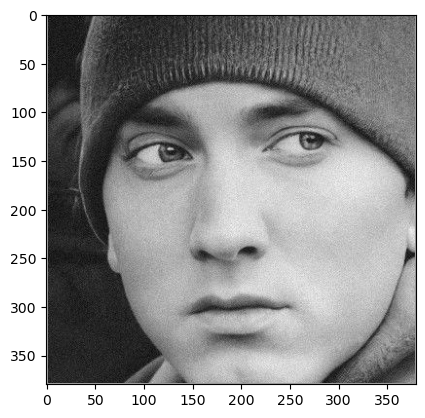

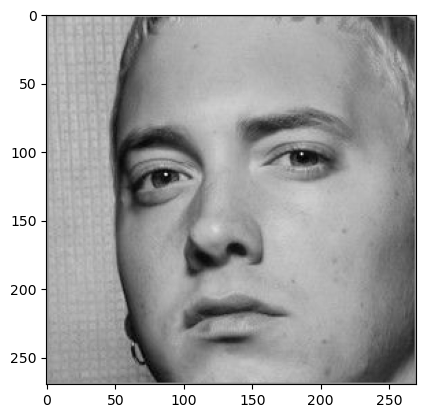

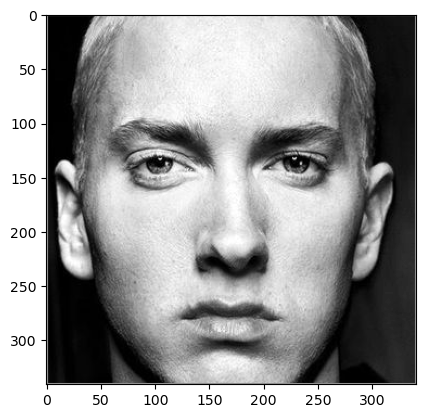

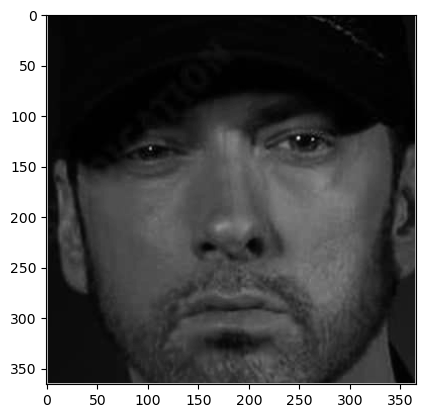

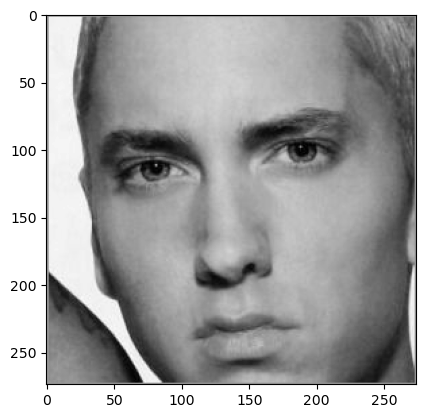

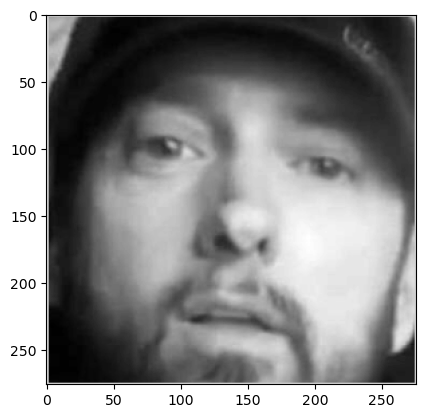

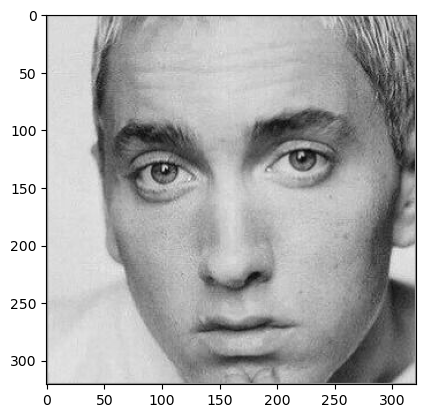

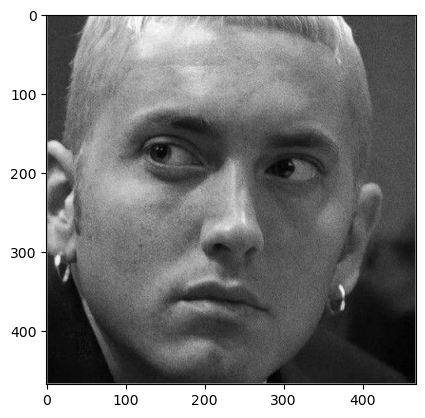

(13,)


c:\Users\Vishnuram\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [95]:
img_values = []
for i in range(len(images)):
    img = images[i]
    faces_rect = img_faces[i]
    if faces_rect is not None:
        for(x, y, w, h) in faces_rect:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

            img_g = cv2.cvtColor(img[y : y+h, x: x+w], cv2.COLOR_BGR2GRAY) 
            img_values.append(img_g)
            plt.imshow(img_g, cmap = 'gray')
            plt.show()
        # cv2.imshow('Detected faces', img)
        # cv2.waitKey(0)

        # cvtColor(img, cv2.COLOR_BGR2GRAY)
print(np.shape(img_values))

In [96]:
for i in range(len(img_values)):
    img_values[i] = cv2.resize(img_values[i], (64, 64))
    # plt.imshow(img_values[i], cmap = 'gray')
    # plt.show()

In [97]:
kanye = []
for i in range(len(img_values) - 2):
    kanye.append(img_values[i].flatten())
kanye = np.array(kanye)
print(kanye)

[[150 150 150 ... 127 132 145]
 [150 150 150 ...  16  16  28]
 [ 87  57  58 ...  20  20  20]
 ...
 [  5   5   4 ...   3   3   8]
 [187 208 209 ...  93  77  80]
 [136 131 132 ...  36  36  36]]


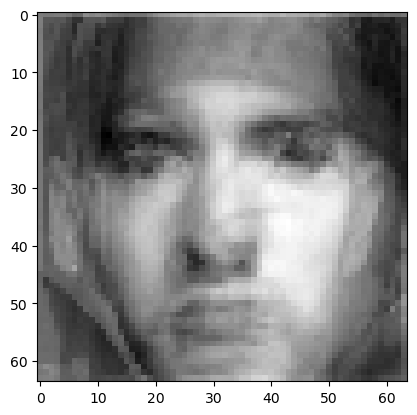

In [98]:
kanye=np.array(kanye)
df=pd.DataFrame(np.vstack(kanye))
mean = df.mean().to_numpy()
plt.imshow(np.reshape(mean,[64,64]), cmap= 'gray')
plt.show()

In [99]:
mean = mean.tolist()

In [100]:
from csv import writer
mean.append("Eminem")
with open('C:\Vishnu\semester Files\Machine learning\project\code\csv_files\data.csv', 'a') as f_object:
    writer_object = writer(f_object)
    writer_object.writerow(mean)
    f_object.close()